In [1]:
import os
import tarfile
from six.moves import urllib

In [2]:
!pwd

/Users/oriolpalacios/projects/hands-on/notebooks


In [3]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("..", "data", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [4]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
  if not os.path.isdir(housing_path): #creates the directory if it does not find it
    os.makedirs(housing_path)
  tgz_path = os.path.join(housing_path, "housing.tgz") # creating the path for looking the dataset in the repo, and at the same time the location in which it will save the dataset
  urllib.request.urlretrieve(housing_url, tgz_path) # download the dataset
  housing_tgz = tarfile.open(tgz_path) # opens the tarball and creates an interface for it
  housing_tgz.extractall(path=housing_path, filter="data") # extract all the contents in the specified directory
  housing_tgz.close() # close the file, it is a good practice


In [5]:
import polars as pl
import pandas as pd

In [6]:
def load_housing_data(housing_path=HOUSING_PATH, library=pl):
  csv_path = os.path.join(housing_path, "housing.csv")
  return library.read_csv(csv_path)

In [7]:
fetch_housing_data()

In [8]:
housing = load_housing_data()

In [9]:
pd_housing = load_housing_data(library=pd)

In [10]:
housing.head()

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
f64,f64,f64,f64,f64,f64,f64,f64,f64,str
-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,"""NEAR BAY"""
-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,"""NEAR BAY"""
-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,"""NEAR BAY"""
-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,"""NEAR BAY"""
-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,"""NEAR BAY"""


In [11]:
housing.schema

Schema([('longitude', Float64),
        ('latitude', Float64),
        ('housing_median_age', Float64),
        ('total_rooms', Float64),
        ('total_bedrooms', Float64),
        ('population', Float64),
        ('households', Float64),
        ('median_income', Float64),
        ('median_house_value', Float64),
        ('ocean_proximity', String)])

In [12]:
housing.estimated_size()

1654237

In [13]:
housing.describe()

statistic,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,str
"""count""",20640.0,20640.0,20640.0,20640.0,20433.0,20640.0,20640.0,20640.0,20640.0,"""20640"""
"""null_count""",0.0,0.0,0.0,0.0,207.0,0.0,0.0,0.0,0.0,"""0"""
"""mean""",-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.53968,3.870671,206855.816909,null
"""std""",2.003532,2.135952,12.585558,2181.615252,421.38507,1132.462122,382.329753,1.899822,115395.615874,null
"""min""",-124.35,32.54,1.0,2.0,1.0,3.0,1.0,0.4999,14999.0,"""<1H OCEAN"""
"""25%""",-121.8,33.93,18.0,1448.0,296.0,787.0,280.0,2.5637,119600.0,null
"""50%""",-118.49,34.26,29.0,2127.0,435.0,1166.0,409.0,3.5349,179700.0,null
"""75%""",-118.01,37.71,37.0,3148.0,647.0,1725.0,605.0,4.7431,264700.0,null
"""max""",-114.31,41.95,52.0,39320.0,6445.0,35682.0,6082.0,15.0001,500001.0,"""NEAR OCEAN"""


In [14]:
housing['ocean_proximity'].value_counts()

ocean_proximity,count
str,u32
"""INLAND""",6551
"""NEAR OCEAN""",2658
"""NEAR BAY""",2290
"""ISLAND""",5
"""<1H OCEAN""",9136


In [15]:
housing.select(
    pl.col('ocean_proximity').value_counts(sort=True)
).unnest('ocean_proximity')

ocean_proximity,count
str,u32
"""<1H OCEAN""",9136
"""INLAND""",6551
"""NEAR OCEAN""",2658
"""NEAR BAY""",2290
"""ISLAND""",5


In [16]:
!pip install hvplot

In [17]:
import hvplot.polars

In [18]:
!pip install plotly holoviews pyarrow

In [19]:
import plotly.express as px

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
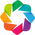

:NdLayout   [Variable]
   :Histogram   [median_house_value]   (Count)

In [20]:
import holoviews as hv
hv.extension('bokeh')
housing.hvplot.hist(subplots=True, shared_axes=False, width=300, height=300)

In [21]:
import numpy as np
def split_train_test(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data[train_indices], data[test_indices]

In [22]:
train_set, test_set = split_train_test(housing, 0.2)

In [23]:
train_set

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
f64,f64,f64,f64,f64,f64,f64,f64,f64,str
-122.09,37.67,39.0,2069.0,500.0,1408.0,478.0,3.1115,153500.0,"""NEAR BAY"""
-117.78,34.09,32.0,2643.0,516.0,1862.0,478.0,3.7177,177200.0,"""INLAND"""
-118.04,34.12,30.0,2170.0,318.0,984.0,309.0,5.6916,500001.0,"""INLAND"""
-119.69,36.86,20.0,1676.0,263.0,786.0,240.0,4.0,164600.0,"""INLAND"""
-118.37,34.08,22.0,3008.0,938.0,1224.0,816.0,3.2149,300000.0,"""<1H OCEAN"""
…,…,…,…,…,…,…,…,…,…
-120.6,35.1,16.0,3290.0,686.0,1497.0,655.0,2.6875,178200.0,"""<1H OCEAN"""
-118.28,34.08,42.0,1618.0,522.0,1454.0,440.0,3.1607,182000.0,"""<1H OCEAN"""
-117.07,32.73,18.0,2968.0,656.0,1149.0,581.0,2.6452,154200.0,"""NEAR OCEAN"""


In [24]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
  return crc32(np.int64(identifier)) & 0xffffffff < test_ratio *2**32

def split_train_test_by_id(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.map_elements(lambda id_: test_set_check(id_, test_ratio), return_dtype = pl.Boolean)
  return data.filter(~in_test_set), data.filter(in_test_set)

In [25]:
housing_with_id = housing.with_row_index(name="index", offset=0)
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")


In [26]:
housing_with_id

index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
u32,f64,f64,f64,f64,f64,f64,f64,f64,f64,str
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,"""NEAR BAY"""
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,"""NEAR BAY"""
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,"""NEAR BAY"""
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,"""NEAR BAY"""
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,"""NEAR BAY"""
…,…,…,…,…,…,…,…,…,…,…
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,"""INLAND"""
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,"""INLAND"""
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7,92300.0,"""INLAND"""


In [27]:
housing_with_id = housing.with_columns((pl.col("longitude") + pl.col("latitude")).alias("id"))

In [28]:
housing_with_id

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64
-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,"""NEAR BAY""",-84.35
-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,"""NEAR BAY""",-84.36
-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,"""NEAR BAY""",-84.39
-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,"""NEAR BAY""",-84.4
-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,"""NEAR BAY""",-84.4
…,…,…,…,…,…,…,…,…,…,…
-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,"""INLAND""",-81.61
-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,"""INLAND""",-81.72
-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7,92300.0,"""INLAND""",-81.79


In [29]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [30]:
train_set

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
f64,f64,f64,f64,f64,f64,f64,f64,f64,str
-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,"""NEAR OCEAN"""
-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,"""NEAR OCEAN"""
-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,"""NEAR OCEAN"""
-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,"""NEAR OCEAN"""
-119.8,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,"""INLAND"""
…,…,…,…,…,…,…,…,…,…
-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.37,229200.0,"""<1H OCEAN"""
-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.05,97800.0,"""INLAND"""
-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,"""<1H OCEAN"""


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
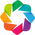

:NdLayout   [Variable]
   :Histogram   [median_house_value]   (Count)

In [31]:
import holoviews as hv
hv.extension('bokeh')
housing.hvplot.hist(subplots=True, shared_axes=False, width=300, height=300)

In [32]:
pd_housing["income_cat"] = pd.cut(
    pd_housing["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 5., np.inf],
    labels=[1,2,3,4,5]
)

In [33]:
income_cat_counts = pd_housing["income_cat"].value_counts().sort_index()

<Axes: >

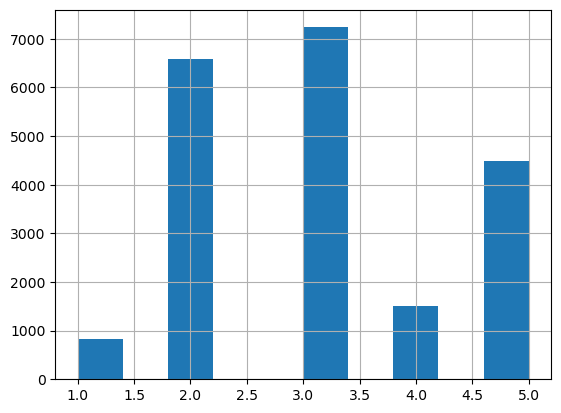

In [34]:
pd_housing["income_cat"].hist()

<Axes: xlabel='income_cat', ylabel='count'>

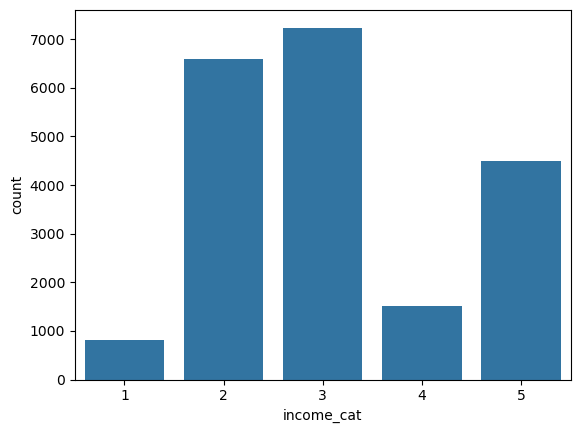

In [35]:
import seaborn as sns
sns.countplot(x="income_cat", data=pd_housing)

In [36]:
housing.head()

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
f64,f64,f64,f64,f64,f64,f64,f64,f64,str
-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,"""NEAR BAY"""
-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,"""NEAR BAY"""
-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,"""NEAR BAY"""
-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,"""NEAR BAY"""
-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,"""NEAR BAY"""


In [37]:
housing = housing.with_columns(
    pl.col("median_income").cut(breaks=[1.5, 3.0, 4.5, 5.], labels=["1","2","3","4","5"]).alias("income_cat")
)

<Axes: xlabel='income_cat', ylabel='count'>

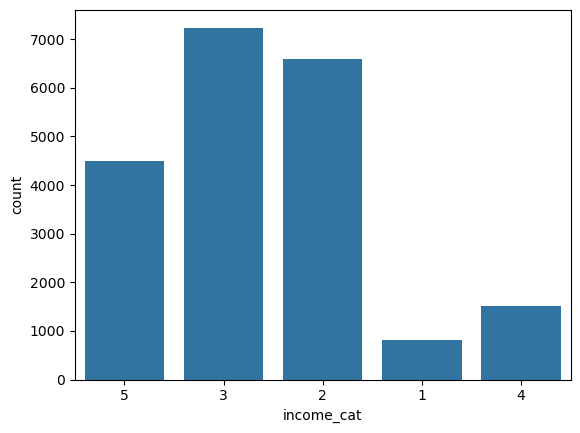

In [38]:
sns.countplot(x="income_cat", data=housing)

In [39]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [40]:
for train_index, test_index in split.split(pd_housing, pd_housing["income_cat"]):
  strat_train_set_pd = pd_housing.loc[train_index]
  strat_test_set_pd = pd_housing.loc[test_index]

In [41]:
# now on polars dataset
for train_index, test_index in split.split(housing, housing['income_cat']):
  strat_train_set = housing[train_index]
  strat_test_set = housing[test_index]

model_selection StratifiedShuffleSplit works well on both, polars and pantas

In [42]:
pd_housing.value_counts('income_cat', normalize=True).sort_index()

income_cat
1    0.039826
2    0.318847
3    0.350581
4    0.073256
5    0.217490
Name: proportion, dtype: float64

In [43]:
housing.select(
    pl.col('income_cat').value_counts(normalize=True)
).unnest('income_cat')

income_cat,proportion
cat,f64
"""3""",0.350581
"""2""",0.318847
"""4""",0.073256
"""1""",0.039826
"""5""",0.21749


In [44]:
type(housing)

polars.dataframe.frame.DataFrame

In [45]:
strat_train_set.select(
    pl.col('income_cat').value_counts(normalize=True).sort()
).unnest('income_cat')

income_cat,proportion
cat,f64
"""1""",0.039789
"""2""",0.318859
"""3""",0.350594
"""4""",0.07328
"""5""",0.217478


In [46]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat")

In [47]:
for set_ in (strat_train_set_pd, strat_test_set_pd):
  set_.drop("income_cat", axis=1, inplace=True)

## Exploring the data

In [48]:
import matplotlib.pyplot as plt

In [49]:
# creating a copy so that the original set is not modified
housing_pd = strat_train_set_pd.copy()
housing = strat_train_set.clone()

<Axes: xlabel='longitude', ylabel='latitude'>

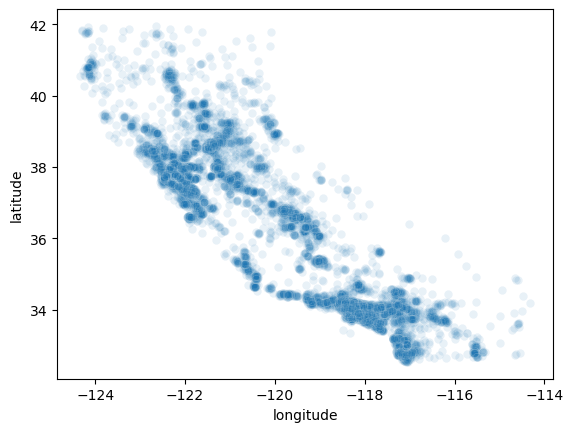

In [50]:
sns.scatterplot(data=housing, x="longitude", y="latitude", alpha=0.1)

<Axes: xlabel='longitude', ylabel='latitude'>

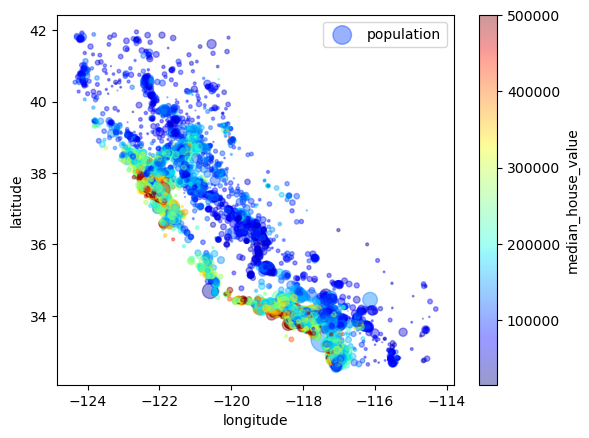

In [51]:
housing_pd.plot(
    kind='scatter',
    x='longitude',
    y='latitude',
    alpha=0.4,
    s=housing['population']/100,
    label='population',
    c='median_house_value',
    cmap=plt.get_cmap('jet'),
)

In [52]:
housing_pd.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20075,-120.28,38.07,13.0,1996.0,410.0,618.0,218.0,2.9083,104600.0,INLAND
17216,-119.71,34.43,48.0,2408.0,536.0,1005.0,497.0,3.5213,458600.0,<1H OCEAN
5618,-118.23,33.78,20.0,59.0,24.0,69.0,23.0,2.5588,350000.0,NEAR OCEAN
12413,-116.22,33.74,26.0,4120.0,858.0,2918.0,815.0,3.3107,69400.0,INLAND
2025,-119.74,36.71,17.0,5872.0,1250.0,5034.0,1224.0,2.1905,61800.0,INLAND


In [53]:
corr_matrix = housing_pd.corr(numeric_only=True)

In [54]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.686469
total_rooms           0.134953
housing_median_age    0.107350
households            0.064122
total_bedrooms        0.046762
population           -0.024778
longitude            -0.049269
latitude             -0.141110
Name: median_house_value, dtype: float64

In [55]:
from polars import selectors as cs
(housing
  .select(cs.numeric())
  .corr()
  .with_columns(index = pl.Series(housing.select(cs.numeric()).columns))
  .select(
      pl.col('index'),
      pl.col('*').exclude('index')
  )
 )

index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
str,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""longitude""",1.0,-0.924457,-0.105106,0.047603,NaN,0.107675,0.06118,-0.020885,-0.049269
"""latitude""",-0.924457,1.0,0.007028,-0.038966,NaN,-0.116041,-0.076404,-0.074344,-0.14111
"""housing_median_age""",-0.105106,0.007028,1.0,-0.36378,NaN,-0.297372,-0.304879,-0.116541,0.10735
"""total_rooms""",0.047603,-0.038966,-0.36378,1.0,NaN,0.857038,0.9197,0.198997,0.134953
"""total_bedrooms""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""population""",0.107675,-0.116041,-0.297372,0.857038,NaN,1.0,0.906356,0.003461,-0.024778
"""households""",0.06118,-0.076404,-0.304879,0.9197,NaN,0.906356,1.0,0.011,0.064122
"""median_income""",-0.020885,-0.074344,-0.116541,0.198997,NaN,0.003461,0.011,1.0,0.686469
"""median_house_value""",-0.049269,-0.14111,0.10735,0.134953,NaN,-0.024778,0.064122,0.686469,1.0


In [56]:
housing_corr = (housing
  .select(cs.numeric())
  .corr()
  .insert_column(
      0, pl.Series("index", housing.select(cs.numeric()).columns)
  )
)

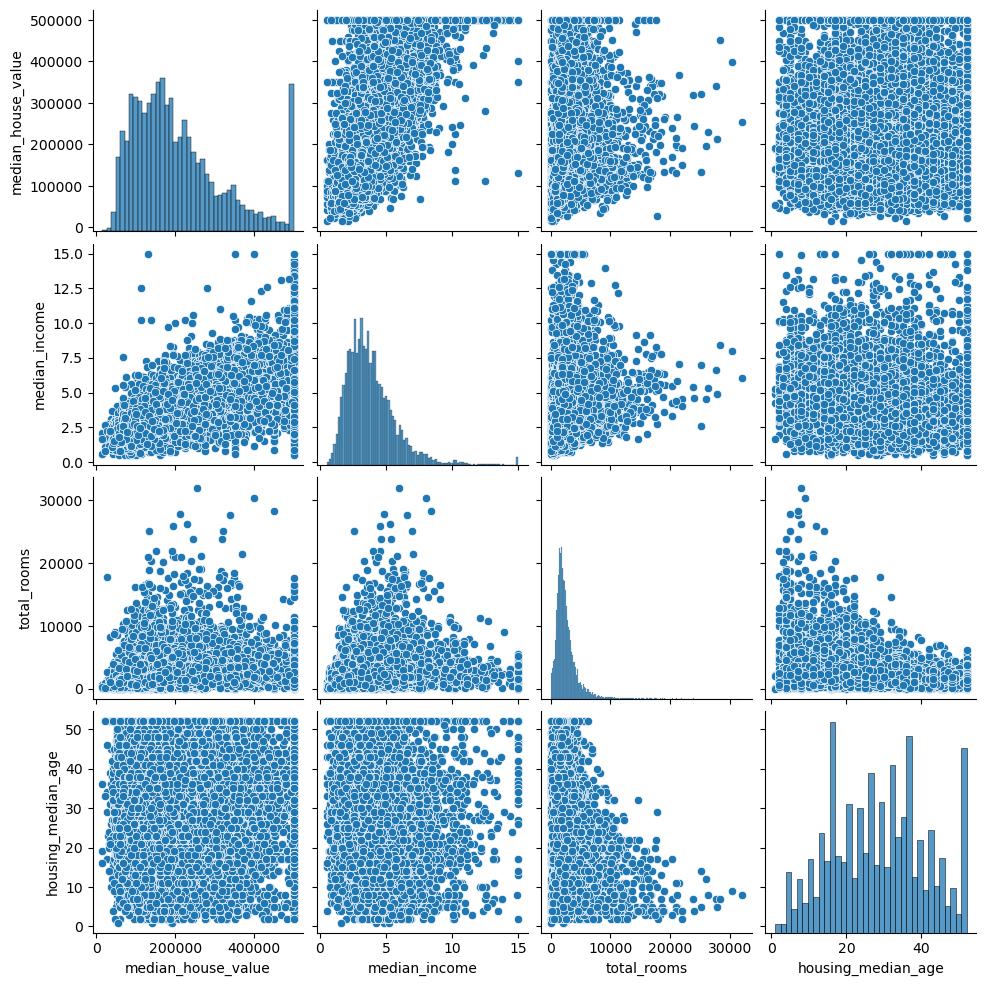

In [57]:
selected_columns = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
sns.pairplot(
    housing.to_pandas(),
    x_vars=selected_columns,
    y_vars=selected_columns,
)

In [58]:
housing_pd[selected_columns].corr(numeric_only=True)

,median_house_value,median_income,total_rooms,housing_median_age
median_house_value,1.000000,0.686469,0.134953,0.107350
median_income,0.686469,1.000000,0.198997,-0.116541
total_rooms,0.134953,0.198997,1.000000,-0.363780
housing_median_age,0.107350,-0.116541,-0.363780,1.000000


In [59]:
test = (housing
  .select(selected_columns)
  .corr()
  .insert_column(0, pl.Series('index', selected_columns))
).to_pandas().set_index('index')

In [60]:
test

,median_house_value,median_income,total_rooms,housing_median_age
index,,,,
median_house_value,1.000000,0.686469,0.134953,0.107350
median_income,0.686469,1.000000,0.198997,-0.116541
total_rooms,0.134953,0.198997,1.000000,-0.363780
housing_median_age,0.107350,-0.116541,-0.363780,1.000000


<Axes: xlabel='median_income', ylabel='median_house_value'>

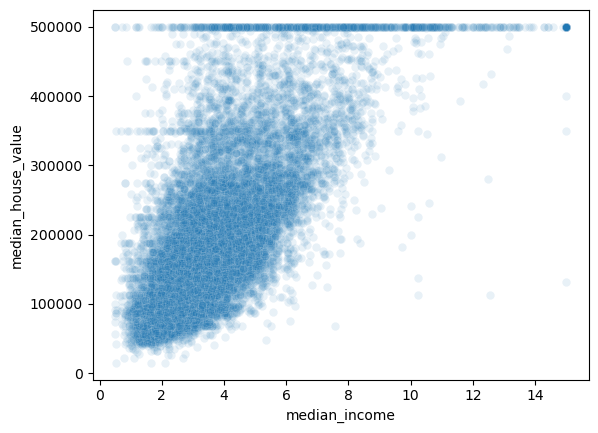

In [61]:
sns.scatterplot(housing, x='median_income', y='median_house_value', alpha=0.1)

In [62]:
housing.glimpse()

Rows: 16512
Columns: 11
$ longitude          <f64> -120.28, -119.71, -118.23, -116.22, -119.74, -118.03, -118.47, -117.29, -122.01, -118.39
$ latitude           <f64> 38.07, 34.43, 33.78, 33.74, 36.71, 34.16, 34.14, 33.12, 37.27, 34.05
$ housing_median_age <f64> 13.0, 48.0, 20.0, 26.0, 17.0, 36.0, 34.0, 4.0, 27.0, 42.0
$ total_rooms        <f64> 1996.0, 2408.0, 59.0, 4120.0, 5872.0, 1401.0, 3646.0, 1380.0, 3340.0, 1467.0
$ total_bedrooms     <f64> 410.0, 536.0, 24.0, 858.0, 1250.0, 218.0, 610.0, 322.0, 451.0, 203.0
$ population         <f64> 618.0, 1005.0, 69.0, 2918.0, 5034.0, 667.0, 1390.0, 755.0, 1220.0, 577.0
$ households         <f64> 218.0, 497.0, 23.0, 815.0, 1224.0, 225.0, 607.0, 286.0, 447.0, 204.0
$ median_income      <f64> 2.9083, 3.5213, 2.5588, 3.3107, 2.1905, 7.1615, 7.629, 4.7961, 8.8178, 6.6368
$ median_house_value <f64> 104600.0, 458600.0, 350000.0, 69400.0, 61800.0, 484700.0, 500001.0, 168800.0, 500001.0, 500001.0
$ ocean_proximity    <str> 'INLAND', '<1H OCEAN', 'NEA

In [63]:
housing = housing.with_columns(
    [
      ((pl.col('total_rooms')/pl.col('households')).alias('rooms_per_household')),
      ((pl.col('total_bedrooms')/pl.col('total_rooms')).alias('bedrooms_per_room')),
      ((pl.col('population')/pl.col('households')).alias('population_per_household'))
    ]
)

In [64]:
housing.select(cs.numeric()).head()

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
-120.28,38.07,13.0,1996.0,410.0,618.0,218.0,2.9083,104600.0,9.155963,0.205411,2.834862
-119.71,34.43,48.0,2408.0,536.0,1005.0,497.0,3.5213,458600.0,4.84507,0.222591,2.022133
-118.23,33.78,20.0,59.0,24.0,69.0,23.0,2.5588,350000.0,2.565217,0.40678,3.0
-116.22,33.74,26.0,4120.0,858.0,2918.0,815.0,3.3107,69400.0,5.055215,0.208252,3.580368
-119.74,36.71,17.0,5872.0,1250.0,5034.0,1224.0,2.1905,61800.0,4.797386,0.212875,4.112745


In [65]:
(housing
  .select(cs.numeric())
  .corr()
  .insert_column(0, pl.Series('index', housing.select(cs.numeric()).columns))
).to_pandas().set_index('index')['median_house_value'].sort_values(ascending=False)

index
median_house_value          1.000000
median_income               0.686469
rooms_per_household         0.145598
total_rooms                 0.134953
housing_median_age          0.107350
households                  0.064122
population_per_household   -0.022073
population                 -0.024778
longitude                  -0.049269
latitude                   -0.141110
total_bedrooms                   NaN
bedrooms_per_room                NaN
Name: median_house_value, dtype: float64

In [66]:
(housing
  .select(cs.numeric())
  .drop_nulls()
  .corr()
  .insert_column(0, pl.Series('index', housing.select(cs.numeric()).columns))
).to_pandas().set_index('index')['median_house_value'].sort_values(ascending=False)

index
median_house_value          1.000000
median_income               0.686459
rooms_per_household         0.144545
total_rooms                 0.133663
housing_median_age          0.108950
households                  0.062923
total_bedrooms              0.046762
population_per_household   -0.022019
population                 -0.025830
longitude                  -0.048540
latitude                   -0.141743
bedrooms_per_room          -0.259476
Name: median_house_value, dtype: float64

In [67]:
housing_pd["rooms_per_household"] = housing_pd["total_rooms"]/housing_pd["households"]
housing_pd["bedrooms_per_room"] = housing_pd["total_bedrooms"]/housing_pd["total_rooms"]
housing_pd["population_per_household"]=housing_pd["population"]/housing_pd["households"]


In [68]:
housing_pd.corr(numeric_only=True)['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.686469
rooms_per_household         0.145598
total_rooms                 0.134953
housing_median_age          0.107350
households                  0.064122
total_bedrooms              0.046762
population_per_household   -0.022073
population                 -0.024778
longitude                  -0.049269
latitude                   -0.141110
bedrooms_per_room          -0.259476
Name: median_house_value, dtype: float64

In [69]:
print(housing.select(pl.col("total_bedrooms").null_count()))

shape: (1, 1)
┌────────────────┐
│ total_bedrooms │
│ ---            │
│ u32            │
╞════════════════╡
│ 166            │
└────────────────┘


In [70]:
housing.shape

(16512, 14)

In [71]:
166/16512*100

1.0053294573643412

## Prepara Data for Machine Learning Algorithms

In [72]:
housing = strat_train_set.clone()
housing_labels = strat_train_set['median_house_value'].clone()

In [73]:
from sklearn.impute import SimpleImputer

In [74]:
imputer = SimpleImputer(strategy="mean")

In [75]:
housing_num = housing.select(cs.numeric()).drop('median_house_value') # Exclude the target variable

In [76]:
imputer.fit(housing_num)

,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'mean'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. If a feature has nomissing values at fit/train time, the feature won't appear onthe missing indicator even if there are missing values attransform/test time.",False
,"keep_empty_features keep_empty_features: bool, default=FalseIf True, features that consist exclusively of missing values when`fit` is called are returned in results when `transform` is called.The imputed value is always `0` except when `strategy=""constant""`in which case `fill_value` will be used instead... versionadded:: 1.2",False


In [77]:
imputer.statistics_

array([-119.57598534,   35.63858103,   28.60047238, 2624.92332849,
        535.2683837 , 1421.45827277,  497.63832364,    3.87620692])

In [78]:
X = imputer.transform(housing_num)

In [79]:
housing_cat = housing['ocean_proximity']

In [80]:
type(housing_cat)

polars.series.series.Series

In [81]:
type(housing.select(pl.col('ocean_proximity')))

polars.dataframe.frame.DataFrame

In [82]:
housing_cat_pd = housing_pd[['ocean_proximity']]

In [83]:
housing_cat.head()

ocean_proximity
str
"""INLAND"""
"""<1H OCEAN"""
"""NEAR OCEAN"""
"""INLAND"""
"""INLAND"""
"""INLAND"""
"""<1H OCEAN"""
"""NEAR OCEAN"""
"""<1H OCEAN"""


In [84]:
# transform categorical data into numerical data
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [85]:
# transformig to numpy array because housing cat is a series object
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat.to_numpy().reshape(-1,1))

In [86]:
housing_cat_encoded.flatten()

array([1., 0., 4., ..., 3., 1., 0.], shape=(16512,))

In [87]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

> when we don't have a scale for the categories or any special hierarchy

In [88]:
housing_cat = housing.select(pl.col('ocean_proximity'))

In [89]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

In [90]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [91]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], shape=(16512, 5))

In [92]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [93]:
from sklearn.base import BaseEstimator, TransformerMixin

In [94]:
housing

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
f64,f64,f64,f64,f64,f64,f64,f64,f64,str,cat
-120.28,38.07,13.0,1996.0,410.0,618.0,218.0,2.9083,104600.0,"""INLAND""","""2"""
-119.71,34.43,48.0,2408.0,536.0,1005.0,497.0,3.5213,458600.0,"""<1H OCEAN""","""3"""
-118.23,33.78,20.0,59.0,24.0,69.0,23.0,2.5588,350000.0,"""NEAR OCEAN""","""2"""
-116.22,33.74,26.0,4120.0,858.0,2918.0,815.0,3.3107,69400.0,"""INLAND""","""3"""
-119.74,36.71,17.0,5872.0,1250.0,5034.0,1224.0,2.1905,61800.0,"""INLAND""","""2"""
…,…,…,…,…,…,…,…,…,…,…
-122.83,38.89,11.0,640.0,134.0,268.0,90.0,3.4514,100000.0,"""<1H OCEAN""","""3"""
-118.92,34.41,22.0,2702.0,655.0,2664.0,571.0,3.0893,173400.0,"""<1H OCEAN""","""3"""
-122.14,37.43,52.0,1327.0,190.0,467.0,189.0,12.5902,500001.0,"""NEAR BAY""","""5"""


In [95]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  # base estimator -> get_param() & set_param()
  # TransformerMixin -> fit_trasnfrom()
  def __init__(self, add_bedrooms_per_room = True):
    self.add_bedrooms_per_room = add_bedrooms_per_room
  def fit(self, X, y=None):
    return self #nothing to do, just overloading
  def transform(self, X, y=None):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    return np.c_[X, rooms_per_household, population_per_household]


In [96]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)

In [97]:
housing_extra_attribs = attr_adder.transform(housing)

In [98]:
housing_extra_attribs[3,:]

array([-116.22, 33.74, 26.0, 4120.0, 858.0, 2918.0, 815.0, 3.3107,
       69400.0, 'INLAND', '3', 5.0552147239263805, 3.5803680981595094],
      dtype=object)

In [99]:
housing_extra_attribs_pd = attr_adder.transform(housing_pd.values)

## Feature Scaling

With few exceptions, ML algorithms don't perform well when the input numerical attributes have very different scales

Standardization: Saves the variation (preserve original distribution) between the points and gather them around 0. Mean 0 and std 1
Normalization: Just rescale all between 0 and 1. Extremenly sensitive to outliers

In [100]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [101]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [102]:
housing_num_tr[1,:]

array([-0.06694839, -0.56546186,  1.54330767, -0.10142381,  0.00431103,
       -0.3727899 , -0.00169248, -0.18601012, -0.22680759, -0.09303653,
        0.13475257])

In [103]:
type(housing.columns)

list

In [104]:
from sklearn.compose import ColumnTransformer

# Redefine num_attribs to exclude the target variable
num_attribs = housing_num.columns
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

In [105]:
housing_prepared = full_pipeline.fit_transform(housing)

In [106]:
housing_prepared.shape

(16512, 16)

## Select and train a model

In [107]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [108]:
housing_num = housing.select(cs.numeric()).drop('median_house_value') # Exclude the target variable

In [109]:
from sklearn.compose import ColumnTransformer

num_attribs = housing_num.columns
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

In [110]:
housing_prepared = full_pipeline.fit_transform(housing)

In [111]:
some_data = housing[:10]
some_labels = housing_labels[:10]

some_data_prepared = full_pipeline.transform(some_data)

In [112]:
print('Preds: ', lin_reg.predict(some_data_prepared))
print('Labels: ', some_labels)

Preds:  [ 87737.01992556 277671.83276343 185050.261589    93354.33429314
  27437.97374    300401.74954684 389117.61389626 235680.24184147
 427724.73767012 337639.67322556]
Labels:  shape: (10,)
Series: 'median_house_value' [f64]
[
	104600.0
	458600.0
	350000.0
	69400.0
	61800.0
	484700.0
	500001.0
	168800.0
	500001.0
	500001.0
]


In [113]:
from sklearn.metrics import mean_squared_error as MSE

In [114]:
housing_num

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
f64,f64,f64,f64,f64,f64,f64,f64
-120.28,38.07,13.0,1996.0,410.0,618.0,218.0,2.9083
-119.71,34.43,48.0,2408.0,536.0,1005.0,497.0,3.5213
-118.23,33.78,20.0,59.0,24.0,69.0,23.0,2.5588
-116.22,33.74,26.0,4120.0,858.0,2918.0,815.0,3.3107
-119.74,36.71,17.0,5872.0,1250.0,5034.0,1224.0,2.1905
…,…,…,…,…,…,…,…
-122.83,38.89,11.0,640.0,134.0,268.0,90.0,3.4514
-118.92,34.41,22.0,2702.0,655.0,2664.0,571.0,3.0893
-122.14,37.43,52.0,1327.0,190.0,467.0,189.0,12.5902


In [115]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = MSE(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

68647.21347902817


In [116]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max

In [117]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = MSE(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

### CV

In [118]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [119]:
def display_scores(scores):
  print('Scores: ', scores)
  print('Mean: ', scores.mean())
  print('Std: ', scores.std())

In [120]:
display_scores(tree_rmse_scores)

Scores:  [74331.89649871 71091.84009607 68825.46929131 73502.72730359
 68285.03127323 73427.79497921 73546.14406044 69975.04121649
 72253.71358033 70633.9175594 ]
Mean:  71587.35758587827
Std:  2028.7127724559198


In [121]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [122]:
forest_scores = cross_val_score(
    forest_reg,
    housing_prepared,
    housing_labels,
    scoring='neg_mean_squared_error',
    cv=10
)
forest_rmse_score = np.sqrt(-forest_scores)

In [123]:
print(forest_rmse_score)

[51677.46172623 48909.83840745 47472.50108157 52666.00502353
 47587.86952033 49542.56186353 53055.04839679 46635.19969274
 50228.18500054 54428.33770437]


In [124]:
display_scores(forest_rmse_score)

Scores:  [51677.46172623 48909.83840745 47472.50108157 52666.00502353
 47587.86952033 49542.56186353 53055.04839679 46635.19969274
 50228.18500054 54428.33770437]
Mean:  50220.30084170811
Std:  2517.099664950206


In [125]:
forest_predicts = forest_reg.predict(housing_prepared)
forest_mse = MSE(housing_labels, forest_predicts)
forest_rmse_score_s = np.sqrt(forest_mse)

In [126]:
print(forest_rmse_score_s)

18720.188774789305


## Fine tuning

In [127]:
from sklearn.model_selection import GridSearchCV

In [128]:
param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2,3,4]}
]


In [129]:
  forest_reg = RandomForestRegressor()
  grid_search = GridSearchCV(
      forest_reg,
      param_grid,
      cv=5,
      scoring='neg_mean_squared_error',
      return_train_score=True
  )

In [130]:
grid_search.fit(housing_prepared, housing_labels)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestRegressor()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","[{'max_features': [2, 4, ...], 'n_estimators': [3, 10, ...]}, {'bootstrap': [False], 'max_features': [2, 3, ...], 'n_estimators': [3, 10]}]"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation t

In [131]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [132]:
print(grid_search.best_estimator_)

RandomForestRegressor(max_features=6, n_estimators=30)


In [133]:
cvres = grid_search.cv_results_

In [134]:
test = pl.DataFrame(cvres)

In [135]:
test.select(
    np.sqrt(-pl.col('mean_test_score')).alias('rmse'),
    pl.col('params')
)

rmse,params
f64,struct[2]
63640.011346,"{2,3}"
55867.635824,"{2,10}"
52665.13883,"{2,30}"
61025.622711,"{4,3}"
52707.572682,"{4,10}"
…,…
54167.248118,"{2,10}"
59933.13452,"{3,3}"
52944.393502,"{3,10}"


In [136]:
cvres['params']

[{'max_features': 2, 'n_estimators': 3},
 {'max_features': 2, 'n_estimators': 10},
 {'max_features': 2, 'n_estimators': 30},
 {'max_features': 4, 'n_estimators': 3},
 {'max_features': 4, 'n_estimators': 10},
 {'max_features': 4, 'n_estimators': 30},
 {'max_features': 6, 'n_estimators': 3},
 {'max_features': 6, 'n_estimators': 10},
 {'max_features': 6, 'n_estimators': 30},
 {'max_features': 8, 'n_estimators': 3},
 {'max_features': 8, 'n_estimators': 10},
 {'max_features': 8, 'n_estimators': 30},
 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3},
 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10},
 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3},
 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10},
 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3},
 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}]

In [137]:
cvres['mean_test_score']

array([-4.05005104e+09, -3.12119273e+09, -2.77361685e+09, -3.72412663e+09,
       -2.77808822e+09, -2.57501891e+09, -3.53937292e+09, -2.67740891e+09,
       -2.53699853e+09, -3.42363623e+09, -2.73953576e+09, -2.54034795e+09,
       -3.83305922e+09, -2.93409077e+09, -3.59198061e+09, -2.80310880e+09,
       -3.51661474e+09, -2.62288035e+09])

In [138]:
list(zip(cvres['params'], cvres['mean_test_score']))

[({'max_features': 2, 'n_estimators': 3}, np.float64(-4050051044.1548157)),
 ({'max_features': 2, 'n_estimators': 10}, np.float64(-3121192732.5917726)),
 ({'max_features': 2, 'n_estimators': 30}, np.float64(-2773616847.9528)),
 ({'max_features': 4, 'n_estimators': 3}, np.float64(-3724126627.2664595)),
 ({'max_features': 4, 'n_estimators': 10}, np.float64(-2778088217.9860225)),
 ({'max_features': 4, 'n_estimators': 30}, np.float64(-2575018910.68947)),
 ({'max_features': 6, 'n_estimators': 3}, np.float64(-3539372924.6944327)),
 ({'max_features': 6, 'n_estimators': 10}, np.float64(-2677408908.6530805)),
 ({'max_features': 6, 'n_estimators': 30}, np.float64(-2536998531.605153)),
 ({'max_features': 8, 'n_estimators': 3}, np.float64(-3423636226.428879)),
 ({'max_features': 8, 'n_estimators': 10}, np.float64(-2739535756.138451)),
 ({'max_features': 8, 'n_estimators': 30}, np.float64(-2540347946.7064314)),
 ({'bootstrap': False, 'max_features': 2, 'n_estimators': 3},
  np.float64(-3833059216.0

In [139]:
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
  print(np.sqrt(-mean_score), params)

63640.011346281324 {'max_features': 2, 'n_estimators': 3}
55867.635824256715 {'max_features': 2, 'n_estimators': 10}
52665.13882971163 {'max_features': 2, 'n_estimators': 30}
61025.622711009346 {'max_features': 4, 'n_estimators': 3}
52707.572681598824 {'max_features': 4, 'n_estimators': 10}
50744.644157679046 {'max_features': 4, 'n_estimators': 30}
59492.629162732694 {'max_features': 6, 'n_estimators': 3}
51743.68472241884 {'max_features': 6, 'n_estimators': 10}
50368.6264613713 {'max_features': 6, 'n_estimators': 30}
58511.84688957339 {'max_features': 8, 'n_estimators': 3}
52340.57466381556 {'max_features': 8, 'n_estimators': 10}
50401.86451617074 {'max_features': 8, 'n_estimators': 30}
61911.70500063626 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54167.248118240794 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59933.13452023152 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52944.39350227625 {'bootstrap': False, 'max_features': 3, 'n_estimator

## Experimentando con pipelines

In [140]:
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [141]:
cat_attribs

['ocean_proximity']

In [142]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])


In [143]:
housing_test = housing.drop('median_house_value')

In [144]:
cat_attribs_values = housing_test['ocean_proximity'].unique().to_list()

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(categories=[cat_attribs_values]), cat_attribs)
])

In [145]:
#CombinedAttributesAdder

whole_pipeline = Pipeline([
    ('preprocess', full_pipeline),
    ('reg', RandomForestRegressor()),
])

In [146]:
param_grid = [
    {
      'preprocess__num__attribs_adder__add_bedrooms_per_room': [True, False],
      'reg__n_estimators': [3,10,30],
      'reg__max_features': [2,4,6,8]
    },
    {
      'preprocess__num__attribs_adder__add_bedrooms_per_room': [True, False],
      'reg__bootstrap': [False],
      'reg__n_estimators': [3,10],
      'reg__max_features': [2,3,4],
    },
]

In [147]:
grid_search = GridSearchCV(
    whole_pipeline,
    param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    error_score='raise'
)

In [148]:
grid_search.fit(housing_test, housing_labels)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...Regressor())])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","[{'preprocess__num__attri...__add_bedrooms_per_room': [True, False], 'reg__max_features': [2, 4, ...], 'reg__n_estimators': [3, 10, ...]}, {'preprocess__num__attri...__add_bedrooms_per_room': [True, False], 'reg__bootstrap': [False], 'reg__max_features': [2, 3, ...], 'reg__n_estimators': [3, 10]}]"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22

In [149]:
gr_res = grid_search.cv_results_

In [150]:
test = pl.DataFrame(gr_res)

In [151]:
grid_search.best_params_

{'preprocess__num__attribs_adder__add_bedrooms_per_room': False,
 'reg__max_features': 6,
 'reg__n_estimators': 30}

In [152]:
np.sqrt(-grid_search.best_score_)

np.float64(49914.80329944099)

In [153]:
for mean_score, params in zip(gr_res['mean_test_score'], gr_res['params']):
  print(np.sqrt(-mean_score), params)


63806.48192928336 {'preprocess__num__attribs_adder__add_bedrooms_per_room': True, 'reg__max_features': 2, 'reg__n_estimators': 3}
55496.848680901116 {'preprocess__num__attribs_adder__add_bedrooms_per_room': True, 'reg__max_features': 2, 'reg__n_estimators': 10}
52855.71554153733 {'preprocess__num__attribs_adder__add_bedrooms_per_room': True, 'reg__max_features': 2, 'reg__n_estimators': 30}
61150.14169160759 {'preprocess__num__attribs_adder__add_bedrooms_per_room': True, 'reg__max_features': 4, 'reg__n_estimators': 3}
53035.60884587339 {'preprocess__num__attribs_adder__add_bedrooms_per_room': True, 'reg__max_features': 4, 'reg__n_estimators': 10}
50758.7674586237 {'preprocess__num__attribs_adder__add_bedrooms_per_room': True, 'reg__max_features': 4, 'reg__n_estimators': 30}
58997.30475934846 {'preprocess__num__attribs_adder__add_bedrooms_per_room': True, 'reg__max_features': 6, 'reg__n_estimators': 3}
52211.04090896165 {'preprocess__num__attribs_adder__add_bedrooms_per_room': True, 'reg

## RandomGridSearch

In [154]:
print(grid_search.best_estimator_['reg'])

RandomForestRegressor(max_features=6, n_estimators=30)


In [155]:
feature_importances = grid_search.best_estimator_['reg'].feature_importances_

In [156]:
feature_importances

array([8.49659420e-02, 8.21956672e-02, 4.29276583e-02, 1.94471686e-02,
       1.78702201e-02, 1.95526901e-02, 1.76349010e-02, 3.68135363e-01,
       7.66612727e-02, 1.05345612e-01, 1.48096532e-02, 5.10767265e-03,
       4.68612444e-05, 7.73150448e-03, 1.37567814e-01])

In [157]:
print(whole_pipeline['preprocess'])

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('attribs_adder',
                                                  CombinedAttributesAdder()),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat',
                                 OneHotEncoder(categories=[['<1H OCEAN',
                                                            'NEAR BAY',
                                                            'ISLAND',
                                                  

In [158]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhod", "bedrooms_per_room"]

In [159]:
test = grid_search.best_estimator_.named_steps['preprocess']
cat_encoder = test.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

In [160]:
cat_one_hot_attribs

['<1H OCEAN', 'NEAR BAY', 'ISLAND', 'NEAR OCEAN', 'INLAND']

In [161]:
sorted(zip(feature_importances, attributes), reverse=True)

[(np.float64(0.3681353627939451), 'median_income'),
 (np.float64(0.13756781355594871), 'NEAR OCEAN'),
 (np.float64(0.10534561206273702), 'pop_per_hhod'),
 (np.float64(0.08496594199966571), 'longitude'),
 (np.float64(0.08219566720552329), 'latitude'),
 (np.float64(0.07666127266914508), 'rooms_per_hhold'),
 (np.float64(0.04292765834482655), 'housing_median_age'),
 (np.float64(0.01955269012444412), 'population'),
 (np.float64(0.01944716859797942), 'total_rooms'),
 (np.float64(0.017870220081133485), 'total_bedrooms'),
 (np.float64(0.017634901044801254), 'households'),
 (np.float64(0.014809653152646984), 'bedrooms_per_room'),
 (np.float64(0.0077315044754298606), 'ISLAND'),
 (np.float64(0.005107672647362349), '<1H OCEAN'),
 (np.float64(4.686124441098112e-05), 'NEAR BAY')]

In [162]:
final_model = grid_search.best_estimator_

In [163]:
X_test = strat_test_set.drop('median_house_value')
y_test = strat_test_set['median_house_value'].clone()

In [164]:
final_predictions = final_model.predict(X_test)

In [165]:
final_mse = MSE(y_test, final_predictions)

In [166]:
final_rmse = np.sqrt(final_mse)

In [167]:
final_rmse

np.float64(46318.834932456375)

In [168]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(
    confidence,
    len(squared_errors) - 1,
    loc=squared_errors.mean(),
    scale=stats.sem(squared_errors)
))

array([44365.8351767 , 48192.75472594])

## Exercises

In [169]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel

In [247]:
param_grid = [
    {
        'feature_selection__threshold': [0.01],
        'reg__kernel': ['linear'],
        'reg__C' : np.arange(3000, 4001, 50),
        'reg__gamma': ['scale', 'auto']
    }
]

In [248]:
whole_pipeline = Pipeline([
    ('preprocess', full_pipeline),
    ('feature_selection', SelectFromModel(
        RandomForestRegressor(
            n_estimators = 30,
            max_features = 8
        )
    )),
    ('reg', SVR()),
])

In [249]:
grid_search_svr = GridSearchCV(
    whole_pipeline,
    param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    error_score='raise',
    refit=True
)

In [250]:
grid_search_svr.fit(housing_test, housing_labels)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","Pipeline(step...reg', SVR())])"
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","[{'feature_selection__threshold': [0.01], 'reg__C': array([3000, ..., 3950, 4000]), 'reg__gamma': ['scale', 'auto'], 'reg__kernel': ['linear']}]"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the c

In [251]:
grid_search_svr.best_params_

{'feature_selection__threshold': 0.01,
 'reg__C': np.int64(3500),
 'reg__gamma': 'auto',
 'reg__kernel': 'linear'}

In [252]:
np.sqrt(-grid_search_svr.best_score_)

np.float64(70392.00983150984)

In [253]:
grid_search_svr.best_estimator_.named_steps['feature_selection'].get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x15'], dtype=object)

## Book responses

* Expon: draw different each values from the exponential distribution. Which is ideal to select values between 1 and more. But with a higher probability to select values around the mean but strictly higher than the loc
* Reciprocal: 

In [348]:
from scipy.stats import expon, reciprocal
from sklearn.model_selection import RandomizedSearchCV

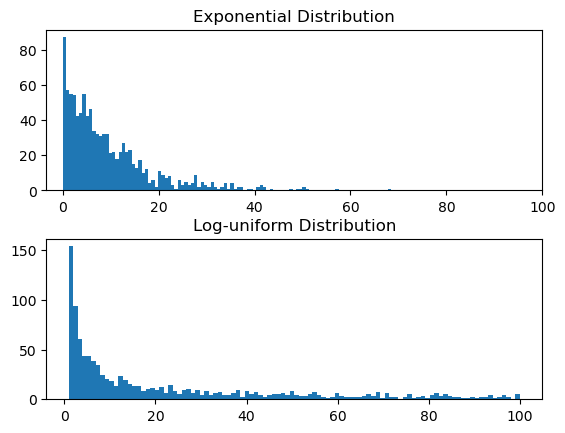

In [346]:
recip = reciprocal.rvs(1, 100, size=1000)
values = expon(scale=10).rvs(size=1000)
plt.subplot(2,1,1)
plt.subplots_adjust(hspace=0.3)
plt.hist(values, bins=100)
plt.xticks(np.arange(0, 101, 20))
plt.title('Exponential Distribution')
plt.subplot(2,1,2)
plt.hist(recip, bins=100)
plt.xticks(np.arange(0, 101, 20))
plt.title('Log-uniform Distribution')
plt.show()


In [352]:
param_distributions = {
    'feature_selection__threshold': [0.01],
    'reg__kernel': ['rbf', 'linear'],
    'reg__C': reciprocal(20, 200000),
    'reg__gamma': expon(scale=1.0)
}

In [353]:
random_search_svr = RandomizedSearchCV(
    whole_pipeline,
    param_distributions,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    error_score='raise',
    refit=True
)

In [354]:
random_search_svr.fit(housing_test, housing_labels)

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","Pipeline(step...reg', SVR())])"
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'feature_selection__threshold': [0.01], 'reg__C': <scipy.stats....t 0x3cf734c20>, 'reg__gamma': <scipy.stats....t 0x3cf734a60>, 'reg__kernel': ['rbf', 'linear']}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",50
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'neg_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscr

In [358]:
random_search_svr.best_params_

{'feature_selection__threshold': 0.01,
 'reg__C': np.float64(27793.007469453416),
 'reg__gamma': np.float64(0.06895206694956975),
 'reg__kernel': 'rbf'}

In [357]:
np.sqrt(-random_search_svr.best_score_)

np.float64(59991.09139535286)

In [388]:
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, features_importances, k):
        self.features_importances = features_importances
        self.k = k

    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.features_importances, self.k)
        return self

    def transform(self, X):
        return X[:, self.feature_indices_] #all rows, only selected columns (features)

In [398]:
feature_importances

array([8.49659420e-02, 8.21956672e-02, 4.29276583e-02, 1.94471686e-02,
       1.78702201e-02, 1.95526901e-02, 1.76349010e-02, 3.68135363e-01,
       7.66612727e-02, 1.05345612e-01, 1.48096532e-02, 5.10767265e-03,
       4.68612444e-05, 7.73150448e-03, 1.37567814e-01])

In [399]:
k = 5
top_k_feature_indices = indices_of_top_k(
    feature_importances,
    k
)

In [400]:
full_pipeline

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name``. e.g. `

In [402]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [403]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing_test)

In [405]:
housing_prepared_top_k_features[0:3, :]

array([[-0.35169772,  1.13759414, -0.50728928, -0.02209134,  0.        ],
       [-0.06694839, -0.56546186, -0.18601012, -0.09303653,  0.        ],
       [ 0.67240075, -0.86957901, -0.69046558, -0.00767606,  1.        ]])

In [407]:
housing_prepared[0:3, top_k_feature_indices]

array([[-0.35169772,  1.13759414, -0.50728928, -0.02209134,  0.        ],
       [-0.06694839, -0.56546186, -0.18601012, -0.09303653,  0.        ],
       [ 0.67240075, -0.86957901, -0.69046558, -0.00767606,  0.        ]])